# Глава 2 (Иванов Илья, группа 3530901/70203)

## Упражнение 2.1.
If you use Jupyter, load `chap02.ipynb` and try out the examples.
You can also view the notebook at http://tinyurl.com/thinkdsp02

`chap02.ipynb` был просмотрен и разобран

## Упражнение 2.2.
A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave

Write a class called SawtoothSignal that extends Signal and provides evaluate to evaluate a sawtooth signal.

Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves?

In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

Класс, описывающий пилообразный сигнал:

In [2]:
class SawtoothSignal(thinkdsp.Sinusoid):
    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / (math.pi *2)
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

`evaluate` вычисляет значения сигнала в заданную последовательность моментов времени(`ts`). `cycles` - число циклов со времени старта, `frac`-дробная часть, растущая от 0 до 1 за каждый период. `unbias` сдвигает `frac` так, что он растёт от -0.5 до 0.5

Воспроизведём получившийся сигнал

In [3]:
signal_saw = SawtoothSignal().make_wave(duration=2, framerate=40000)
signal_saw.make_audio()

С помощью метода make_spectrum() получим спектр сигнала

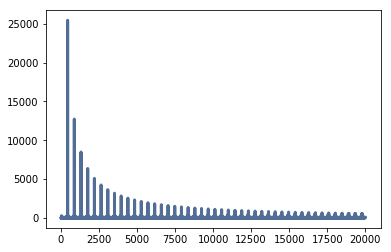

In [4]:
signal_saw.make_spectrum().plot()

Сравним полученный спектр со спектором прямоугольного сигнала

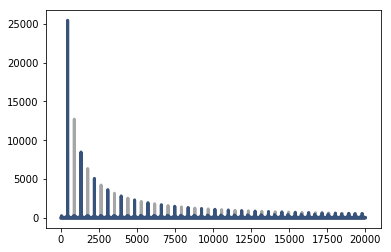

In [5]:
signal_saw.make_spectrum().plot(color='gray')
signal_square = thinkdsp.SquareSignal(amp=0.5).make_wave(duration=2, framerate=40000)
signal_square.make_spectrum().plot()

Легко заметить, что амплитуда гармоник пилообразного сигнала убывает аналогично прямоугольному, но включает как четные, так и нечетные гармоники

Сравним полученный спектр со спектором треугольного сигнала

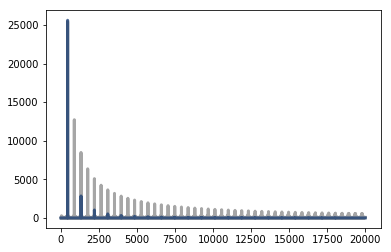

In [6]:
signal_saw.make_spectrum().plot(color='gray')
signal_triang = thinkdsp.TriangleSignal(amp=0.79).make_wave(duration=2, framerate=40000)
signal_triang.make_spectrum().plot()

Амплитуда гармоник треугольного сигнала убывает значительно быстрее (она убывает пропорционально квадрату частоты, а амплитуда гармоник пилообразного сигнала убывает пропорционально частоте).

## Упражнение 2.3.
Make a square signal at 1100 Hz and make a wave that samples it at 10000 frames per second. If you plot the spectrum, you can see that most of the harmonics are aliased. When you listen to the wave, can you hear the aliased harmonics?


In [7]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

Создадим wave с framerate=10000 из прямоугольного сигнала с частотой 1100 Гц

In [8]:
wave_square = thinkdsp.SquareSignal(1100).make_wave(duration=0.5, framerate=10000)

Получим спектр

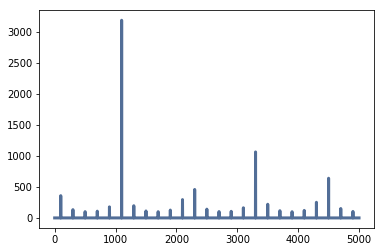

In [9]:
wave_square.make_spectrum().plot()

Гармоники сигнала должны быть 3300, 5500, 7700 и 9900 Гц. На 1100 Гц и 3300 Гц ожидаемо есть пики, однако третий пик находится на 4500, а не на 5500 Гц. Четвёртый пик находится на 2300, а не на 7700 Гц. Пятый пик находится на 100, а не на 9900 Гц.

При прослушивании можно расслышать эти гармоники в виде низкого тона

In [10]:
wave_square.make_audio()

## Упражнение 2.4.
If you have a spectrum object, spectrum, and print the first few values of spectrum.fs, you’ll see that they start at zero. So spectrum.hs\[0\] is the magnitude of the component with frequency 0. But what does that mean?

Try this experiment:

1. Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
2. Make a Spectrum object and print spectrum.hs\[0\]. What is the amplitude and phase of this component?
3. Set spectrum.hs\[0\] = 100. Make a Wave from the modified Spectrum and plot it. What effect does this operation have on the waveform?


In [11]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

Создадим wave длительностью 0.01 секунды из треугольного сигнала с частотой 440 Гц 

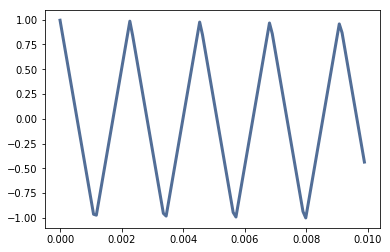

In [12]:
wave_triang = thinkdsp.TriangleSignal(freq=440).make_wave(duration=0.01)
wave_triang.plot()

Получим спектр сигнала и посмотрим значение `spectrum.hs[0]` (амплитуда и фаза компоненты с нулевой частотой)

In [13]:
spectrum = wave_triang.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

Получаем комплексное число, близкое к нулю

Изменение `spectrum.hs[0]` ведёт к сдвигу графика сигнала по оси y

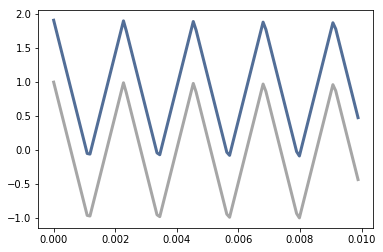

In [14]:
spectrum.hs[0] = 100
wave_triang.plot(color='gray')
spectrum.make_wave().plot()

## Упражнение 2.5.
Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Hint: since division by zero is undefined, you might want to set spectrum.hs\[0\] = 0.

Test your function using a square, triangle, or sawtooth wave.

1. Compute the Spectrum and plot it.
2. Modify the Spectrum using your function and plot it again.
3. Make a Wave from the modified Spectrum and listen to it. What effect does this operation have on the signal?

In [15]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

Написанная функция

In [16]:
def spectrum_modifier(spectrum):
    spectrum.hs /= spectrum.fs
    spectrum.hs[0] = 0

Для тестирования функции создадим треугольный сигнал

In [17]:
wave_test = thinkdsp.TriangleSignal(freq=440).make_wave(duration=0.5)
wave_test.make_audio()

Модифицируем сигнал функцией `spectrum_modifier()` и сравним спектры "до" и "после"

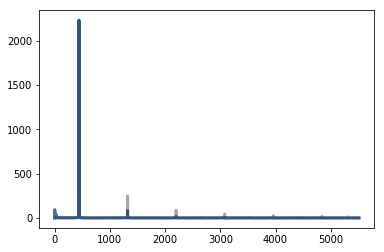

In [18]:
spectrum_test = wave_test.make_spectrum()
spectrum_test.plot(high=10000, color='gray')
spectrum_modifier(spectrum_test)
spectrum_test.scale(440)
spectrum_test.plot(high=10000)

Легко заметить, что `spectrum_modifier()` работает как фильтр низких частот

Прослушаем отфильтрованную версию

In [19]:
filtered = spectrum.make_wave()
filtered.make_audio()

Треугольный сигнал стал звучать очень похоже на синусоидальный

## Упражнение 2.6.
Triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to 1/ f ; the harmonics of the triangle wave drop off like 1/(f^2). Can you find a waveform that has even and odd harmonics that drop off like 1/(f^2)?

Hint: There are two ways you could approach this: you could construct the signal you want by adding up sinusoids, or you could start with a signal that is similar to what you want and modify it.

In [20]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

Пойдём по второму пути и модифицируем пилообразный сигнал, который уже содержит все необходимые гармоники

In [21]:
signal_6 = thinkdsp.SawtoothSignal(freq=500)
wave_6 = signal_6.make_wave(duration=1, framerate=20000)
wave_6.make_audio()

Получим его спектр

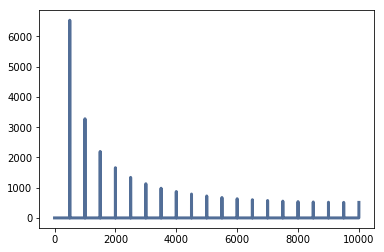

In [22]:
spectrum_6 = wave_6.make_spectrum()
spectrum_6.plot()

Амплитуда гармоник пилообразного сигнала убывает пропорционально частоте ( 1/f )

Используя функцию `spectrum_modifier()` из упражнения 2.5. добьёмся того, чтобы амплитуда гармоник сигнала убывала пропорционально квадрату частоты ( 1/(f^2) ) и сравним спектры "до" и "после"

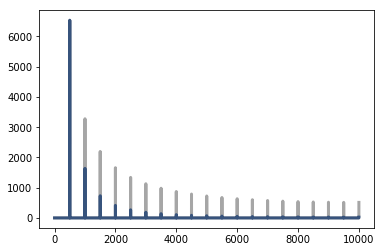

In [23]:
spectrum_6.plot(color='gray')
spectrum_modifier(spectrum_6)
spectrum_6.scale(500)
spectrum_6.plot()

Амплитуда гармоник модифицированного сигнала убывает пропорционально квадрату частоты ( 1/(f^2) )

Прослушаем получившийся сигнал

In [24]:
wave_6 = spectrum_6.make_wave()
wave_6.make_audio()

Сам сигнал выглядит следующим образом

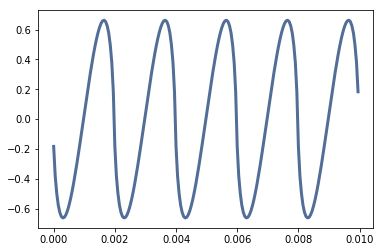

In [25]:
wave_6.segment(duration=0.01).plot()